In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [156]:
train=pd.read_csv("train_ctrUa4K.csv")

In [157]:
test_original=pd.read_csv("test_lAUu6dG.csv")

In [158]:
test=pd.read_csv("test_lAUu6dG.csv")

In [159]:
train_orginal=train.copy()

In [160]:
test_orginal=test.copy()

In [161]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [162]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [163]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [164]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [165]:
train.shape

(614, 13)

In [166]:
test.shape

(367, 12)

In [167]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [168]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

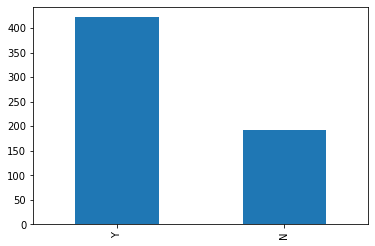

In [169]:
train['Loan_Status'].value_counts().plot.bar()

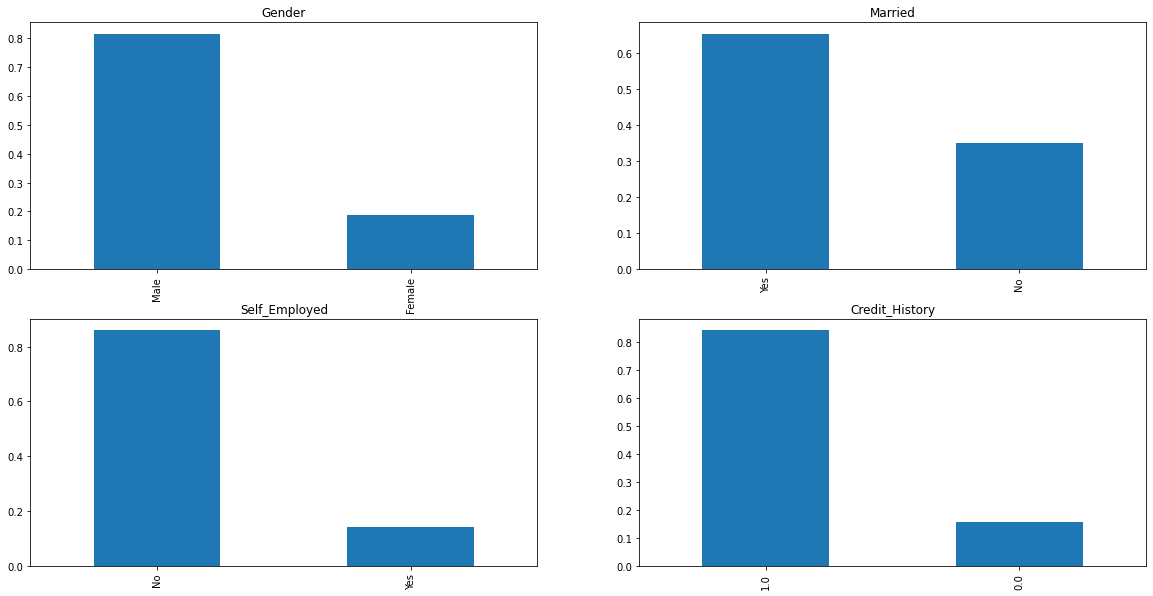

In [170]:
from IPython.core.pylabtools import figsize
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History')

plt.show()

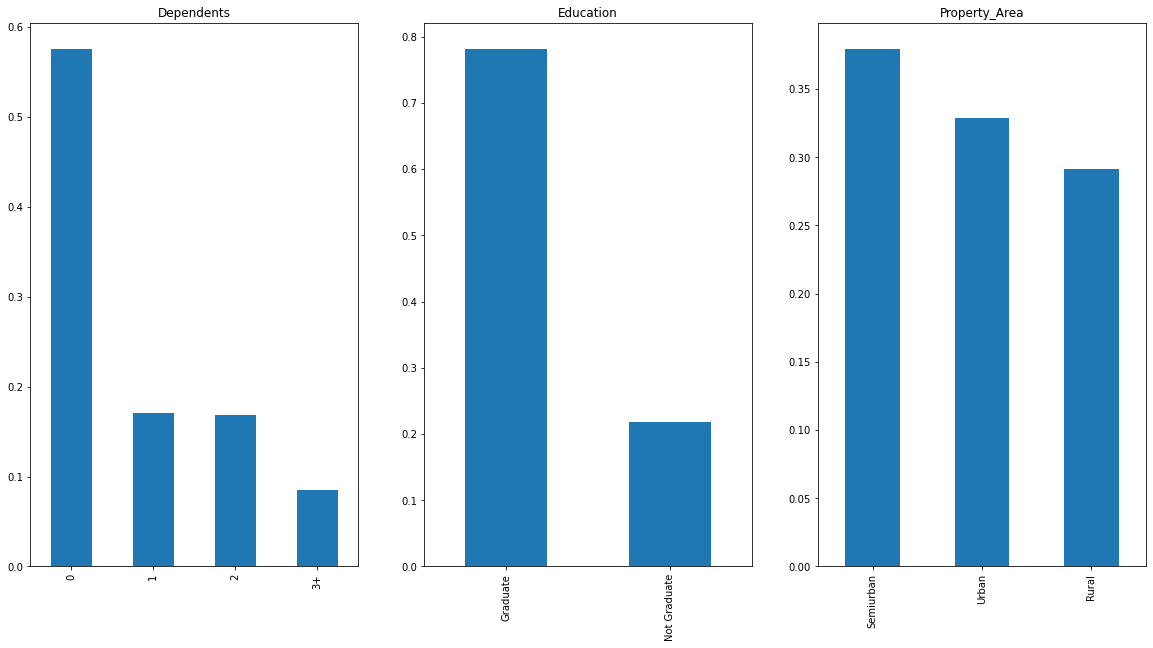

In [171]:

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Property_Area')

plt.show()

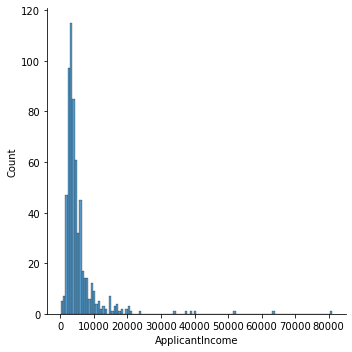

In [172]:

sns.displot(train['ApplicantIncome']);

plt.show()


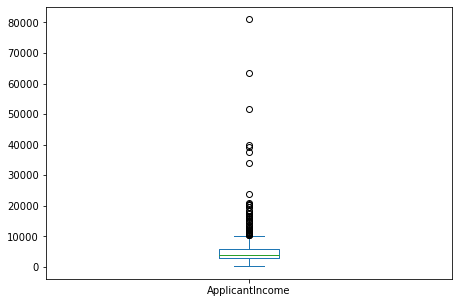

In [173]:
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5));

plt.show()

Text(0.5, 0.98, '')

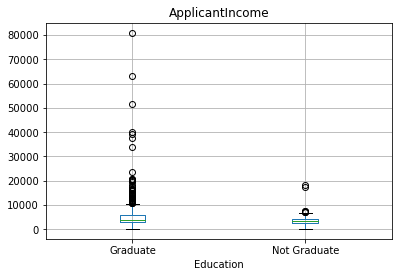

In [174]:
from matplotlib.text import Text
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

Text(0.5,0.98,'')

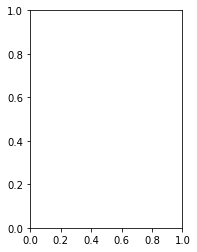

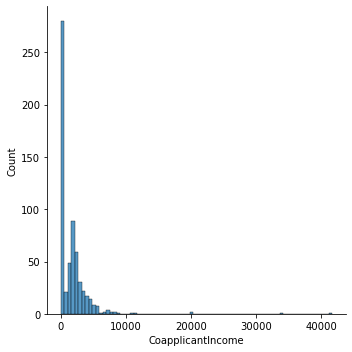

In [175]:

plt.subplot(121)
sns.displot(train['CoapplicantIncome']);

plt.show()

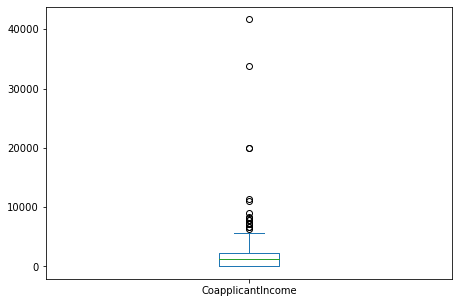

In [176]:


plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

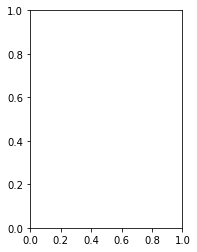

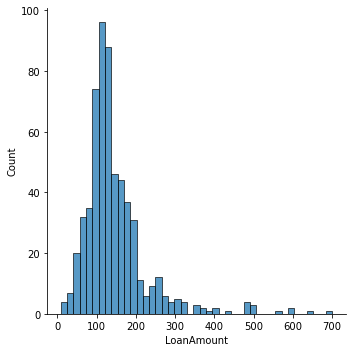

In [177]:


plt.subplot(121)
df=train.dropna()
sns.displot(train['LoanAmount']);

plt.show()

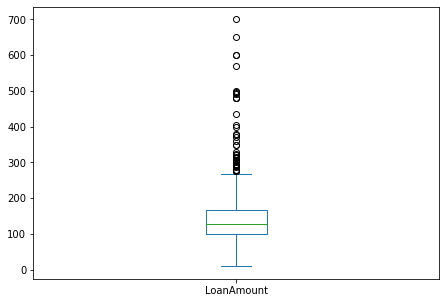

In [178]:
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

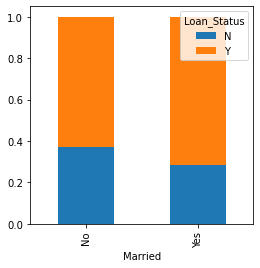

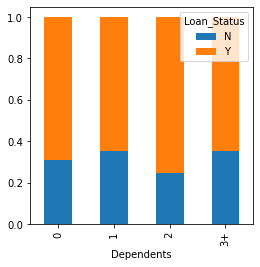

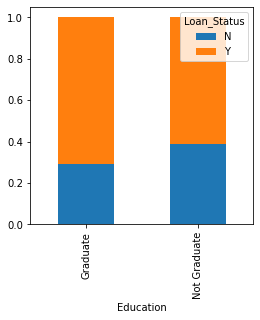

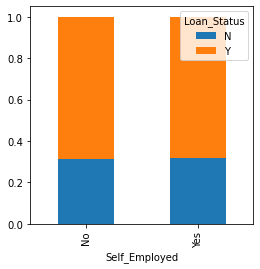

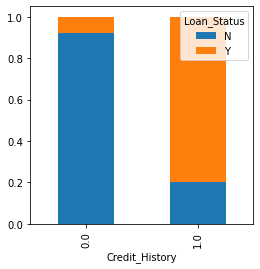

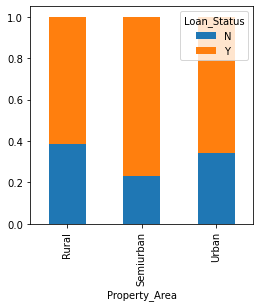

In [179]:

for i in train.columns:
    if i in ['Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area']:
        Gender = pd.crosstab(train[i],train['Loan_Status'])
        Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

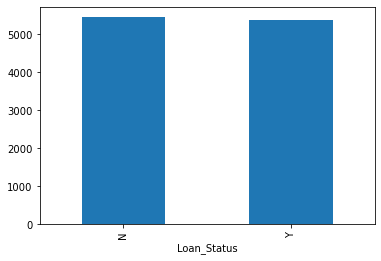

In [180]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [181]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [182]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

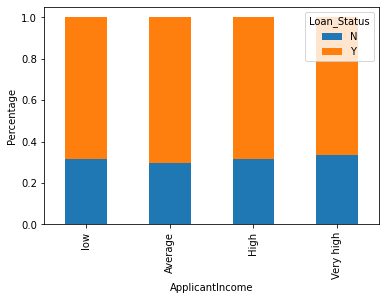

In [183]:
bins=[0,2500,4000,6000,81000]
group=['low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')

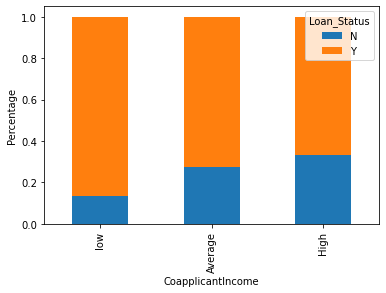

In [184]:
bins=[0,1000,3000,42000]
groups=['low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

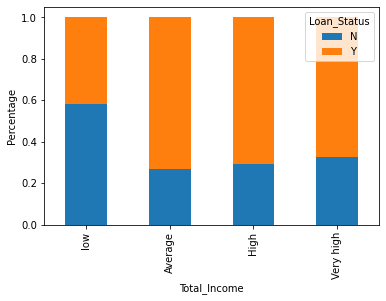

In [185]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

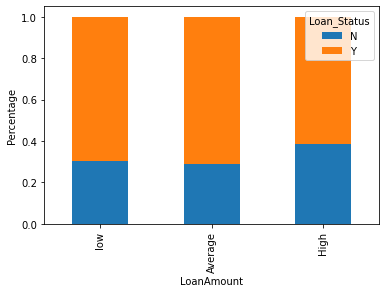

In [186]:
bins=[0,100,200,700]
groups=['low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=groups)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [187]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [188]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],axis=1)


In [189]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)



In [190]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

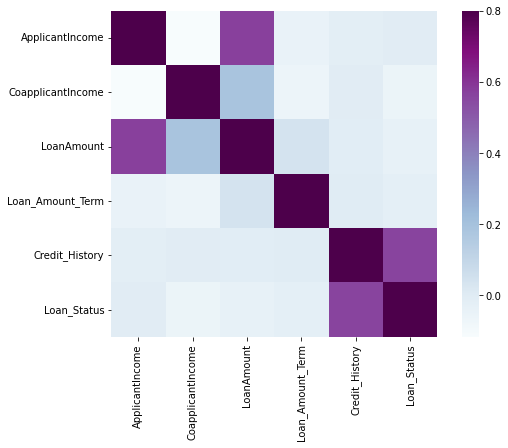

In [191]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [192]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [193]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [194]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [195]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [196]:

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [197]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [198]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [199]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
#test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [200]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

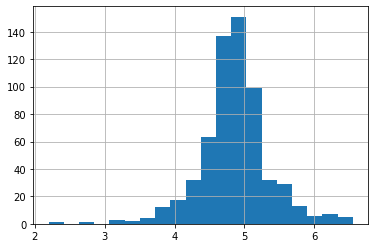

In [201]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log']=np.log(test['LoanAmount'])

In [202]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [203]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [204]:
X=pd.get_dummies(X)

In [205]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [206]:
from sklearn.model_selection import train_test_split

In [207]:

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [208]:
#-- test---
#public_df,Private_df = train_test_split(test, test_size=0.25)

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [210]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [211]:
LogisticRegression(C=1.0,class_weight=None, dual=False,
                  fit_intercept=True, intercept_scaling=1,
                  max_iter=100,multi_class='ovr',n_jobs=1,
                  penalty='12',random_state=1,solver='liblinear',
                  tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [212]:
#-- test---
#x_cv,y_cv = train_test_split(public_df, test_size=0.2)

In [213]:
#-- test--
#pred_cv=model.predict(x_cv)

In [214]:
pred_cv=model.predict(x_cv)


In [215]:
accuracy_score(y_cv,pred_cv)


0.7945945945945946

In [216]:
pred_test=model.predict(test)

In [217]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [218]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [219]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [221]:

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('LogisticRegression.csv',index = False)

In [223]:
from sklearn.model_selection import StratifiedKFold

In [224]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [225]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [227]:
from sklearn import metrics 


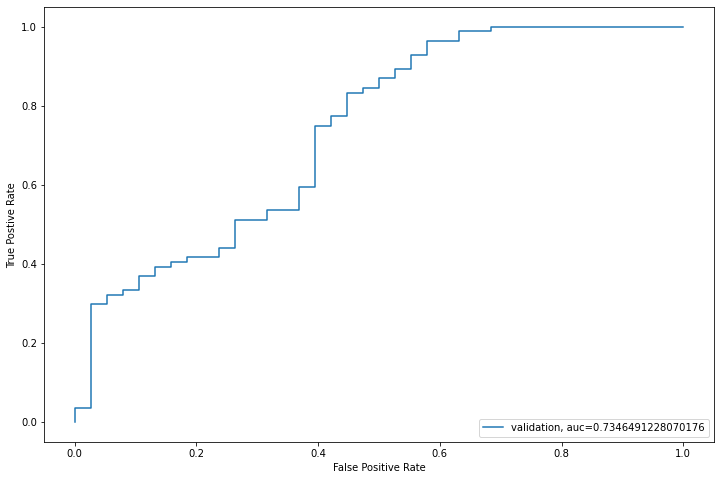

In [228]:
fpr,tpr, _ =metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc=4)
plt.show()

In [229]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('StratifiedKFold.csv',index = False)

In [231]:
#Feature Engineering

In [230]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

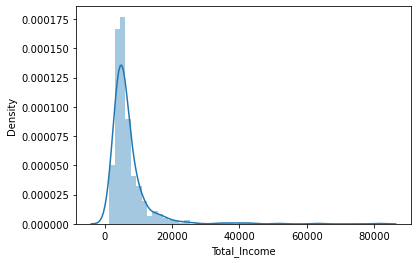

In [232]:
sns.distplot(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

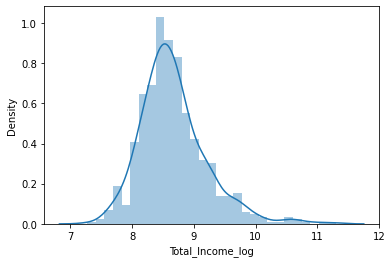

In [234]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])



<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

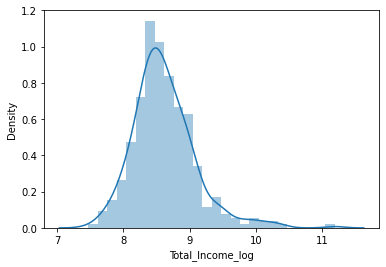

In [235]:

test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(test['Total_Income_log'])

In [237]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']

In [238]:
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

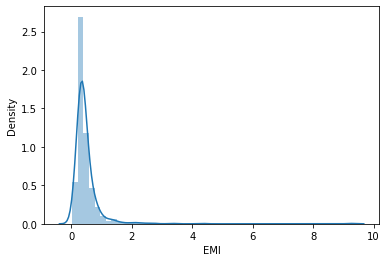

In [239]:
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

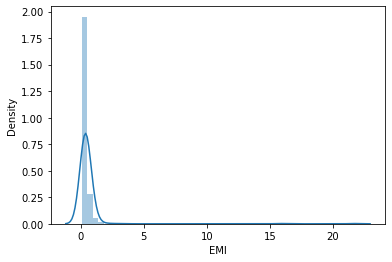

In [240]:
sns.distplot(test['EMI'])

In [241]:
#Multiply with 1000 to make the units equal 
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)

In [242]:
#Multiply with 1000 to make the units equal 
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

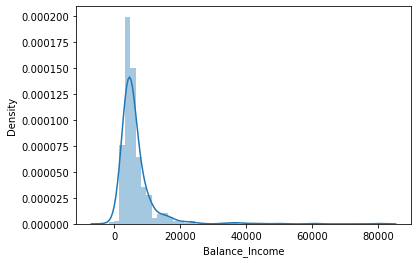

In [243]:
sns.distplot(train['Balance_Income'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

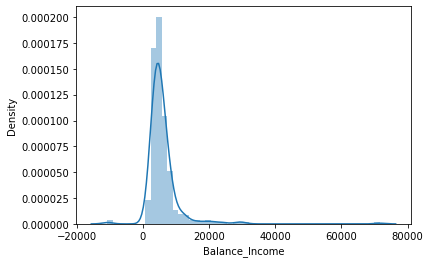

In [244]:
sns.distplot(test['Balance_Income'])

In [245]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income', 'Total_Income_log', 'EMI',
       'Balance_Income'],
      dtype='object')

In [246]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)


In [248]:

test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)


In [249]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [250]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [251]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [252]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv',index = False)

In [253]:
#Decision Tree

In [255]:
from sklearn import tree

In [254]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [256]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [257]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('DecisionTreeClassifier.csv',index = False)

In [258]:
#RandomForestClassifier

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [261]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [262]:
#GridSearchCV

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
# provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid={'max_depth': list(range(i,20,2)), 'n_estimators': list(range(i,200,20))}

In [265]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [266]:
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [267]:
# fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [6, 26, 46, 66, 86, 106, 126, 146, 166,
                                          186]})

In [274]:
GridSearchCV(cv=None,  error_score='raise',
            estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
            criterion='gini',   max_depth=None,   max_features='auto',
            max_leaf_nodes=None,            min_impurity_decrease=0.0,
#            min_impurity_split=None,      min_sample_leaf=1,
            n_estimators=10,   n_jobs=1,   oob_score=False,   random_state=1,
            verbose=0,    warm_start=False),
#            fit_params=None,   iid=True,  
             n_jobs=1,
            param_grid={'max_depth': [1,3,5,7,9,11,13,15,17,19],
                         'n_estimators': [1,21,41,61,81,101,121,141,161,181]},
            pre_dispatch='2*n_jobs',   refit=True,   return_train_score='warn',
            scoring=None,       verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [275]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=86, random_state=1)

In [279]:
 estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
            criterion='gini',   max_depth=3,   max_features='auto',
            max_leaf_nodes=None,            min_impurity_decrease=0.0,
           #min_impurity_split=None,      min_sample_leaf=1,
           # min_sample_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=41,   n_jobs=1,   oob_score=False,   random_state=1,
            verbose=0,    warm_start=False)

In [280]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [281]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1, max_depth=3,
                                n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7786885245901639


In [282]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv',index = False)

<AxesSubplot:>

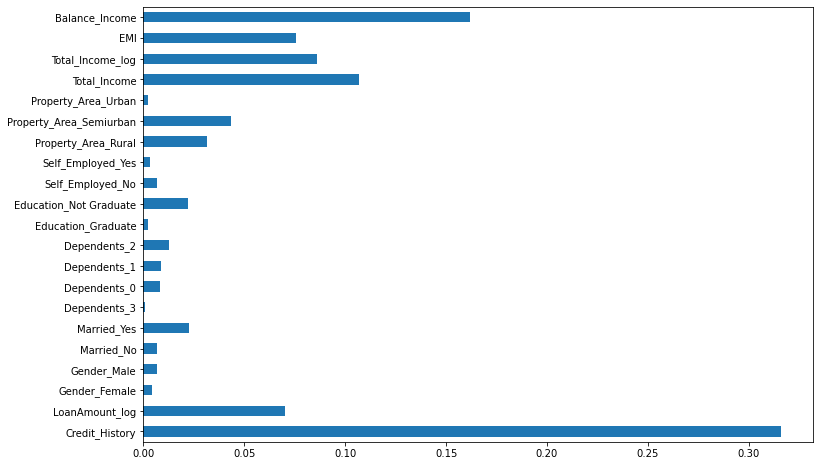

In [283]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

In [284]:
#XGBOOST

In [286]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [287]:
from xgboost import XGBClassifier

In [288]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [289]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model= XGBClassifier( max_depth=3, n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.7560975609756098

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7642276422764228

5 of kfold 5
accuracy_score 0.7786885245901639


In [290]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv',index = False)